In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv('F:/Data_Science/Height_Weight_Index.csv')

In [2]:
df

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [4]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
gender=LabelEncoder()
df['Sex']=gender.fit_transform(df['Gender'])

In [6]:
df['Index'].unique()

array([4, 2, 3, 5, 1, 0], dtype=int64)

In [7]:
bins=(-1,0,1,2,3,4,5)
health=('Extreme Weak','Weak','Normal','OverWeight','Obesity','Extreme Obesity')
df['Health']=pd.cut(df['Index'],bins=bins, labels=health)

In [8]:
df

,Gender,Height,Weight,Index,Sex,Health
0,Male,174,96,4,1,Obesity
1,Male,189,87,2,1,Normal
2,Female,185,110,4,0,Obesity
3,Female,195,104,3,0,OverWeight
4,Male,149,61,3,1,OverWeight
...,...,...,...,...,...,...
495,Female,150,153,5,0,Extreme Obesity
496,Female,184,121,4,0,Obesity
497,Female,141,136,5,0,Extreme Obesity
498,Male,150,95,5,1,Extreme Obesity


In [9]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

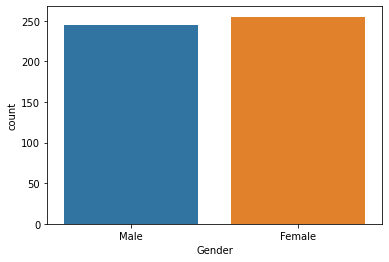

In [10]:
sns.countplot(df['Gender'])

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

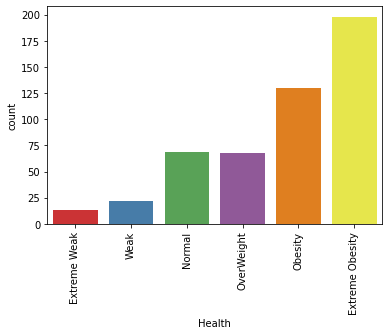

In [11]:
sns.countplot(x='Health', data=df,palette="Set1")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

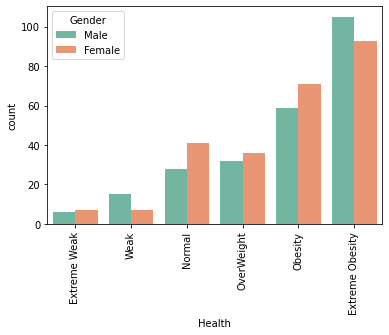

In [12]:
sns.countplot(x='Health', hue='Gender', data=df,palette="Set2")
plt.xticks(rotation=90)

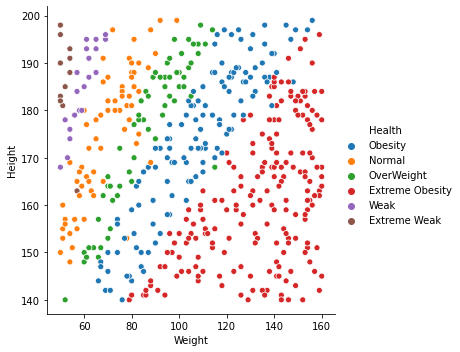

In [13]:
sns.relplot(x='Weight',y='Height',hue='Health',data=df )

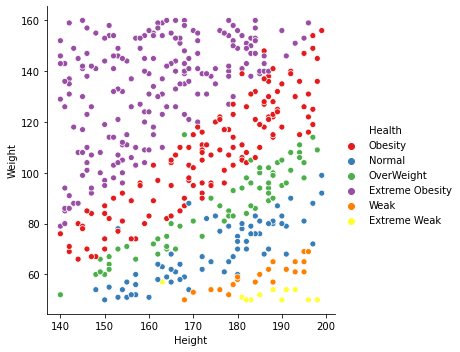

In [14]:
sns.relplot(x='Height',y='Weight',hue='Health',data=df,palette="Set1" )

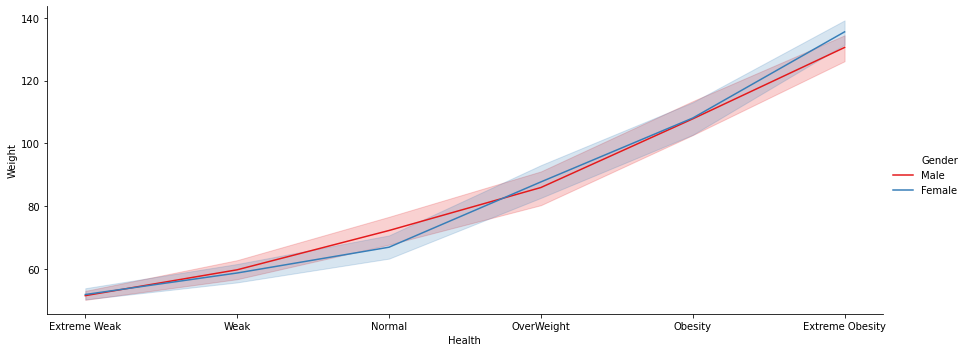

In [15]:
sns.relplot(x='Health',y='Weight',hue='Gender',kind='line',data=df,palette="Set1",aspect=2.5 )

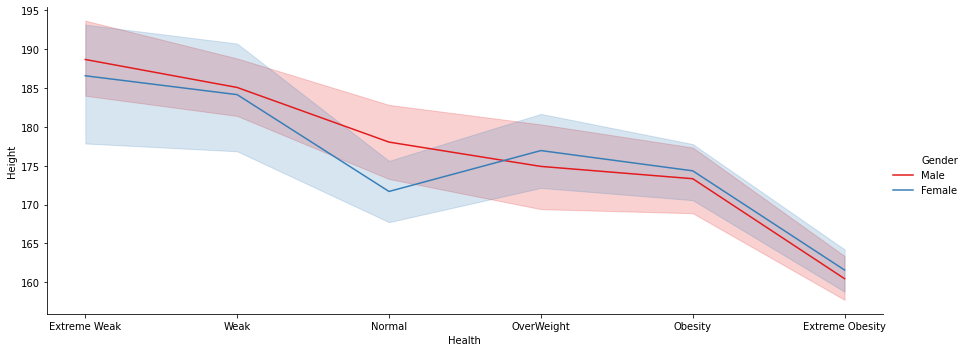

In [16]:
sns.relplot(x='Health',y='Height',hue='Gender',kind='line',data=df,palette="Set1" , height=5, aspect=2.5)

In [17]:
df

,Gender,Height,Weight,Index,Sex,Health
0,Male,174,96,4,1,Obesity
1,Male,189,87,2,1,Normal
2,Female,185,110,4,0,Obesity
3,Female,195,104,3,0,OverWeight
4,Male,149,61,3,1,OverWeight
...,...,...,...,...,...,...
495,Female,150,153,5,0,Extreme Obesity
496,Female,184,121,4,0,Obesity
497,Female,141,136,5,0,Extreme Obesity
498,Male,150,95,5,1,Extreme Obesity


In [18]:
df.drop(['Gender','Index'],axis=1,inplace=True)

In [19]:
X=df.drop('Health',axis=1)
y=df['Health']

In [20]:
X

,Height,Weight,Sex
0,174,96,1
1,189,87,1
2,185,110,0
3,195,104,0
4,149,61,1
...,...,...,...
495,150,153,0
496,184,121,0
497,141,136,0
498,150,95,1


In [21]:
y

0              Obesity
1               Normal
2              Obesity
3           OverWeight
4           OverWeight
            ...       
495    Extreme Obesity
496            Obesity
497    Extreme Obesity
498    Extreme Obesity
499    Extreme Obesity
Name: Health, Length: 500, dtype: category
Categories (6, object): [Extreme Weak < Weak < Normal < OverWeight < Obesity < Extreme Obesity]

In [22]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [24]:
s=StandardScaler()
X_train=s.fit_transform(X_train)
X_test=s.transform(X_test)

In [25]:
svmodel=SVC()
svmodel.fit(X_train,y_train)
svmodel.score(X_test,y_test)

0.88

In [26]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=10)
cross_val_score(SVC(),X,y,cv=cv).mean()

0.7984

In [28]:
def cross_val_score_model(model):
    cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=10)
    cv_score=cross_val_score(model,X,y,cv=cv).mean()
    print('CV_Score' + ' '+ str(model) +': '+ str(cv_score))

cross_val_score_model(SVC())
cross_val_score_model(RandomForestClassifier())
cross_val_score_model(DecisionTreeClassifier())
cross_val_score_model(LogisticRegression(solver='liblinear',multi_class='auto'))

CV_Score SVC(): 0.7984
CV_Score RandomForestClassifier(): 0.8560000000000001
CV_Score DecisionTreeClassifier(): 0.8624
CV_Score LogisticRegression(solver='liblinear'): 0.6848000000000001


In [36]:
model_params={
    'svm':{
        'model':SVC(),
        'params':{
            'C':[1,10,100],
            'kernel':['rbf','linear']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[100,200,600,800,1000],
            'criterion' : ['gini', 'entropy']
        }
    },
    'decisionTree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion' : ['gini', 'entropy'],
            'splitter':['best', 'random']
            }
    },
    'logistic regression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'C':[1,5,10]
        }
            
    }

}


In [37]:
scores1=[]
cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=10)
for model_name, mp in model_params.items():
    random_clf=RandomizedSearchCV(mp['model'],mp['params'],cv=cv, return_train_score=False)
    random_clf.fit(X,y)
    scores1.append({
        'model':model_name,
        'best_score':random_clf.best_score_,
        'best param':random_clf.best_params_,
        'best estimator':random_clf.best_estimator_
    })

ds=pd.DataFrame(scores1,columns=['model','best_score','best param','best estimator'])
ds

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


,model,best_score,best param,best estimator
0,svm,0.9568,"{'kernel': 'linear', 'C': 1}","SVC(C=1, kernel='linear')"
1,random_forest,0.8672,"{'n_estimators': 800, 'criterion': 'entropy'}","(DecisionTreeClassifier(criterion='entropy', m..."
2,decisionTree,0.8688,"{'splitter': 'best', 'criterion': 'gini'}",DecisionTreeClassifier()
3,logistic regression,0.6976,{'C': 5},"LogisticRegression(C=5, solver='liblinear')"


In [38]:
def display_text_max_col_width(df, width):
    with pd.option_context('display.max_colwidth', width):
        print(df)

display_text_max_col_width(ds['best param'], 800)

0                     {'kernel': 'linear', 'C': 1}
1    {'n_estimators': 800, 'criterion': 'entropy'}
2        {'splitter': 'best', 'criterion': 'gini'}
3                                         {'C': 5}
Name: best param, dtype: object


In [39]:
cross_val_score_model(SVC(kernel='linear',C=1))
cross_val_score_model(RandomForestClassifier(n_estimators= 800,criterion='entropy'))
cross_val_score_model(DecisionTreeClassifier(criterion='gini',splitter='best'))
cross_val_score_model(LogisticRegression(solver='liblinear',multi_class='auto',C=5))

CV_Score SVC(C=1, kernel='linear'): 0.9568
CV_Score RandomForestClassifier(criterion='entropy', n_estimators=800): 0.8656
CV_Score DecisionTreeClassifier(): 0.8640000000000001
CV_Score LogisticRegression(C=5, solver='liblinear'): 0.6976000000000001


# BEST MODEL : 'SVM MODEL' WITH HYPER PARAMETER TUNING

In [40]:
svmodel_best=SVC(C=1, kernel='linear')
svmodel_best.fit(X_train,y_train)
svmodel_best.score(X_test,y_test)

0.928

In [43]:
df.iloc[25]

Height           151
Weight            64
Sex                0
Health    OverWeight
Name: 25, dtype: object

In [44]:
a=[[151,64,0]]
a=s.transform(a)
b=svmodel_best.predict(a)
b

array(['OverWeight'], dtype=object)